https://qiita.com/fukuit/items/b3fa460577a0ea139c88

In [1]:
'''
Keras(+Tensorflow)でMNISTを実施する
学習中の進捗をグラフで表示する
'''

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import RMSprop
from keras.callbacks import Callback, CSVLogger
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import argparse
%matplotlib inline

Using TensorFlow backend.


In [2]:
# データロード
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# データの成型
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')/255
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')/255

# convert one-hot vector
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

print(x_train.shape, "x_train")
print(y_train.shape, "y_train")

(60000, 28, 28, 1) x_train
(60000, 10) y_train


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

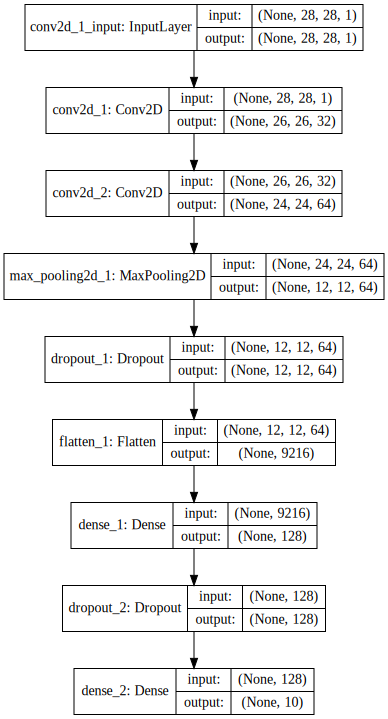

In [4]:
# モデルの構築
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

print(model.summary())

# モデルの可視化
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model=model, show_shapes=True, show_layer_names=True).create(prog='dot', format='svg'))

In [5]:
class PlotLosses(Callback):
    '''
    学習中のlossについてlive plotする
    '''

    def on_train_begin(self, logs={}):
        '''
        訓練開始時に実施
        '''
        self.epoch_cnt = 0      # epochの回数を初期化
        plt.axis([0, self.epochs, 0, 0.25])
        plt.ion()               # pyplotをinteractive modeにする

    def on_train_end(self, logs={}):
        '''
        訓練修了時に実施
        '''
        plt.ioff()              # pyplotのinteractive modeをoffにする
        plt.legend(['loss', 'val_loss'], loc='best')
        plt.show()

    def on_epoch_end(self, epoch, logs={}):
        '''
        epochごとに実行する処理
        '''
        loss = logs.get('loss')
        val_loss = logs.get('val_loss')
        x = self.epoch_cnt
        # epochごとのlossとval_lossをplotする
        plt.scatter(x, loss, c='b', label='loss')
        plt.scatter(x, val_loss, c='r', label='val_loss')
        plt.pause(0.05)
        # epoch回数をcount up
        self.epoch_cnt += 1

In [6]:
# train
batch_size = 128
epochs = 10

# callback function
plot_losses = PlotLosses()      # グラフ表示(live plot)
plot_losses.epochs = epochs

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    #callbacks=[plot_losses],
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 294s 5ms/step - loss: 2.0980 - acc: 0.3545 - val_loss: 1.9572 - val_acc: 0.6386
Epoch 2/10
60000/60000 [==============================] - 279s 5ms/step - loss: 3.1936 - acc: 0.3915 - val_loss: 3.1875 - val_acc: 0.6555
Epoch 3/10
60000/60000 [==============================] - 290s 5ms/step - loss: 4.9114 - acc: 0.3594 - val_loss: 5.2859 - val_acc: 0.5083
Epoch 4/10
60000/60000 [==============================] - 268s 4ms/step - loss: 4.0893 - acc: 0.3615 - val_loss: 5.8712 - val_acc: 0.4671
Epoch 5/10
60000/60000 [==============================] - 274s 5ms/step - loss: 5.6103 - acc: 0.3310 - val_loss: 11.5189 - val_acc: 0.2831
Epoch 6/10
60000/60000 [==============================] - 263s 4ms/step - loss: 8.4551 - acc: 0.2902 - val_loss: 11.5110 - val_acc: 0.2822
Epoch 7/10
60000/60000 [==============================] - 263s 4ms/step - loss: 6.2839 - acc: 0.3350 - val_loss: 7.0050 

In [7]:
# モデル評価
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: {0}'.format(score[0]))
print('Test accuracy: {0}'.format(score[1]))

Test loss: 7.139449982452392
Test accuracy: 0.5562


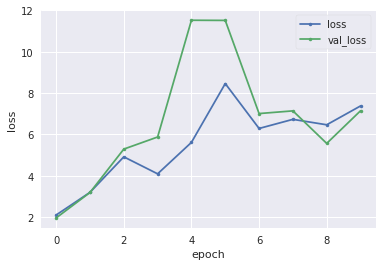

In [8]:
# 結果を可視化
import seaborn as sns
sns.set()

loss     = history.history['loss']
val_loss = history.history['val_loss']

nb_epoch = len(loss)
plt.plot(range(nb_epoch), loss,     marker='.', label='loss')
plt.plot(range(nb_epoch), val_loss, marker='.', label='val_loss')
plt.legend(loc='best', fontsize=10, frameon=True)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

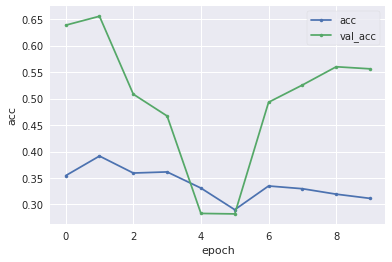

In [9]:
loss     = history.history['acc']
val_loss = history.history['val_acc']

nb_epoch = len(loss)
plt.plot(range(nb_epoch), loss,     marker='.', label='acc')
plt.plot(range(nb_epoch), val_loss, marker='.', label='val_acc')
plt.legend(loc='best', fontsize=10, frameon=True)
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()